In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import seaborn as sns

In [2]:
# Read CSV file into DF
airline_df = pd.read_csv("Resources/Airline_Delay_cause.csv")

# Display beggining of DataFrame
airline_df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",136.0,7.0,5.95,0.00,...,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",91.0,16.0,7.38,0.00,...,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",19.0,2.0,0.13,0.00,...,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,14.0,7.26,0.76,...,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",181.0,19.0,13.84,0.00,...,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0


In [3]:
# Display DataFrame Info
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318017 entries, 0 to 318016
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 318017 non-null  int64  
 1   month                318017 non-null  int64  
 2   carrier              318017 non-null  object 
 3   carrier_name         318017 non-null  object 
 4   airport              318017 non-null  object 
 5   airport_name         318017 non-null  object 
 6   arr_flights          317529 non-null  float64
 7   arr_del15            317289 non-null  float64
 8   carrier_ct           317529 non-null  float64
 9   weather_ct           317529 non-null  float64
 10  nas_ct               317529 non-null  float64
 11  security_ct          317529 non-null  float64
 12  late_aircraft_ct     317529 non-null  float64
 13  arr_cancelled        317529 non-null  float64
 14  arr_diverted         317529 non-null  float64
 15  arr_delay        

In [4]:
# Drop non-null values
airline_clean_df = airline_df.dropna()
airline_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317289 entries, 0 to 318016
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 317289 non-null  int64  
 1   month                317289 non-null  int64  
 2   carrier              317289 non-null  object 
 3   carrier_name         317289 non-null  object 
 4   airport              317289 non-null  object 
 5   airport_name         317289 non-null  object 
 6   arr_flights          317289 non-null  float64
 7   arr_del15            317289 non-null  float64
 8   carrier_ct           317289 non-null  float64
 9   weather_ct           317289 non-null  float64
 10  nas_ct               317289 non-null  float64
 11  security_ct          317289 non-null  float64
 12  late_aircraft_ct     317289 non-null  float64
 13  arr_cancelled        317289 non-null  float64
 14  arr_diverted         317289 non-null  float64
 15  arr_delay        

In [5]:
airline_clean_df

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",136.0,7.0,5.95,0.00,...,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",91.0,16.0,7.38,0.00,...,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",19.0,2.0,0.13,0.00,...,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,14.0,7.26,0.76,...,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",181.0,19.0,13.84,0.00,...,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318012,2003,6,DL,Delta Air Lines Inc.,SEA,"Seattle, WA: Seattle/Tacoma International",480.0,84.0,25.69,3.09,...,0.0,21.26,0.0,0.0,3744.0,978.0,164.0,1023.0,0.0,1579.0
318013,2003,6,DL,Delta Air Lines Inc.,SFO,"San Francisco, CA: San Francisco International",505.0,111.0,21.78,2.24,...,0.0,13.17,3.0,0.0,4284.0,1376.0,138.0,2132.0,0.0,638.0
318014,2003,6,DL,Delta Air Lines Inc.,SJC,"San Jose, CA: Norman Y. Mineta San Jose Intern...",146.0,36.0,6.99,0.00,...,0.0,2.15,0.0,0.0,896.0,205.0,0.0,607.0,0.0,84.0
318015,2003,6,DL,Delta Air Lines Inc.,SJU,"San Juan, PR: Luis Munoz Marin International",95.0,13.0,3.66,0.00,...,0.0,1.42,0.0,0.0,367.0,120.0,0.0,210.0,0.0,37.0


In [6]:
airline_clean_df['carrier_name'].unique()

array(['Endeavor Air Inc.', 'American Airlines Inc.',
       'Alaska Airlines Inc.', 'JetBlue Airways', 'Delta Air Lines Inc.',
       'Frontier Airlines Inc.', 'Allegiant Air',
       'Hawaiian Airlines Inc.', 'Envoy Air', 'Spirit Air Lines',
       'PSA Airlines Inc.', 'SkyWest Airlines Inc.', 'Horizon Air',
       'United Air Lines Inc.', 'Southwest Airlines Co.',
       'Mesa Airlines Inc.', 'Republic Airline',
       'ExpressJet Airlines LLC', 'ExpressJet Airlines Inc.',
       'Virgin America', 'US Airways Inc.', 'AirTran Airways Corporation',
       'American Eagle Airlines Inc.', 'Pinnacle Airlines Inc.',
       'Atlantic Southeast Airlines', 'Continental Air Lines Inc.',
       'Comair Inc.', 'Northwest Airlines Inc.', 'Aloha Airlines Inc.',
       'ATA Airlines d/b/a ATA', 'Independence Air',
       'America West Airlines Inc.', 'Atlantic Coast Airlines'],
      dtype=object)

In [7]:
airline_clean_df2 = airline_clean_df.rename(columns={"arr_flights":"Total Flights", "arr_del15":"Delays", "arr_cancelled":"Cancelled", "carrier_name":"Airline"})
airline_clean_df2.head()

,year,month,carrier,Airline,airport,airport_name,Total Flights,Delays,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,Cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",136.0,7.0,5.95,0.00,...,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",91.0,16.0,7.38,0.00,...,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",19.0,2.0,0.13,0.00,...,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,14.0,7.26,0.76,...,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",181.0,19.0,13.84,0.00,...,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0


# Anthony Rocco-Frank Code

In [8]:
total_flights = airline_clean_df2.groupby(["Airline"]).sum()["Total Flights"]
total_flights_df = pd.DataFrame(total_flights)
total_flights_df.sort_values(by=['Total Flights'], inplace=True, ascending=False)
total_flights_df

,Total Flights
Airline,
Southwest Airlines Co.,22053649.0
Delta Air Lines Inc.,13690394.0
American Airlines Inc.,12971636.0
SkyWest Airlines Inc.,11454934.0
United Air Lines Inc.,9254401.0
ExpressJet Airlines Inc.,7113659.0
US Airways Inc.,5188611.0
American Eagle Airlines Inc.,5184465.0
JetBlue Airways,4027204.0


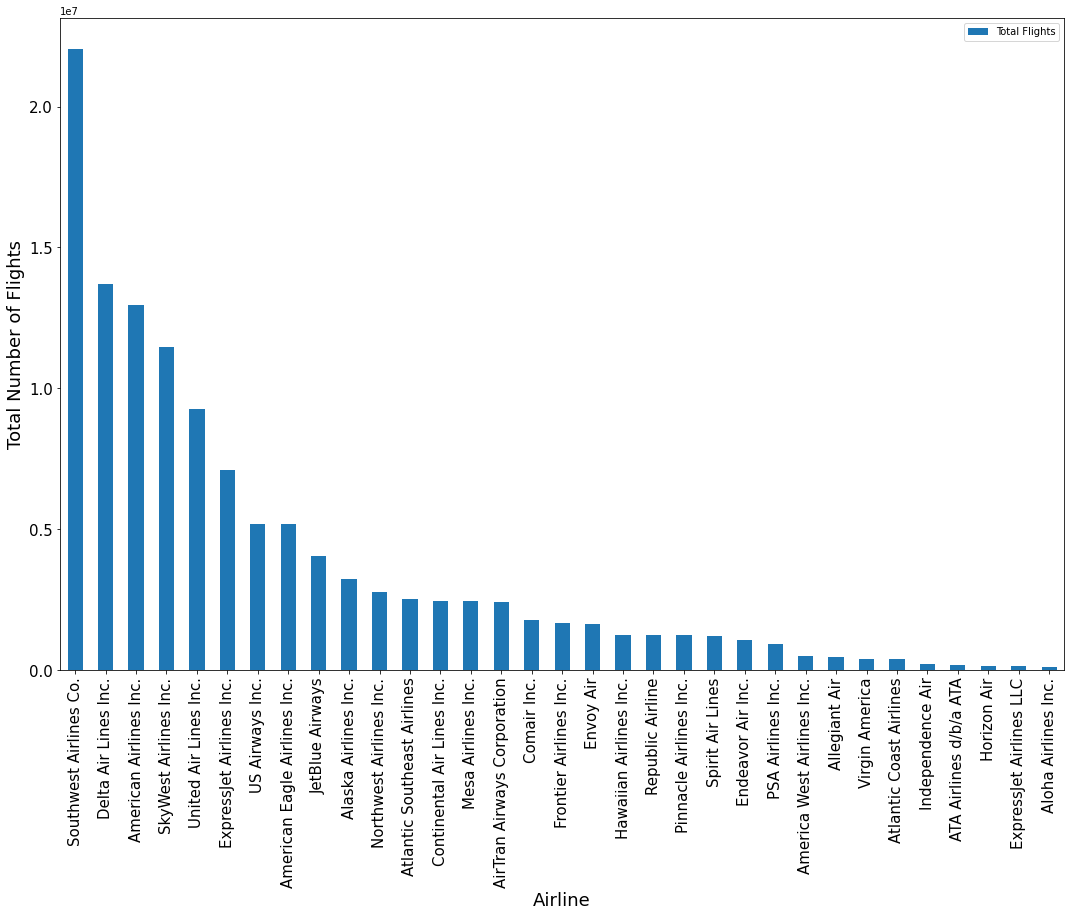

In [9]:
total_flights_bar = total_flights_df.plot(kind="bar", figsize=(18,12),
                                linewidth=10)

plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
total_flights_bar.set_xlabel('Airline', fontsize=18)
total_flights_bar.set_ylabel('Total Number of Flights', fontsize=18)

# Save the figure
plt.savefig("Output Images/Total Flights.png")

# Show plot
plt.show()

In [10]:
total_cancelled = pd.DataFrame(airline_clean_df2.groupby(["Airline"]).sum()["Cancelled"])
total_cancelled_df = pd.DataFrame(total_cancelled)
total_cancelled_df.sort_values(by=['Cancelled'], inplace=True, ascending=False)
total_cancelled_df

,Cancelled
Airline,
Southwest Airlines Co.,339192.0
American Airlines Inc.,265038.0
SkyWest Airlines Inc.,239172.0
ExpressJet Airlines Inc.,191983.0
American Eagle Airlines Inc.,178259.0
Delta Air Lines Inc.,156693.0
United Air Lines Inc.,147098.0
US Airways Inc.,76464.0
JetBlue Airways,74452.0


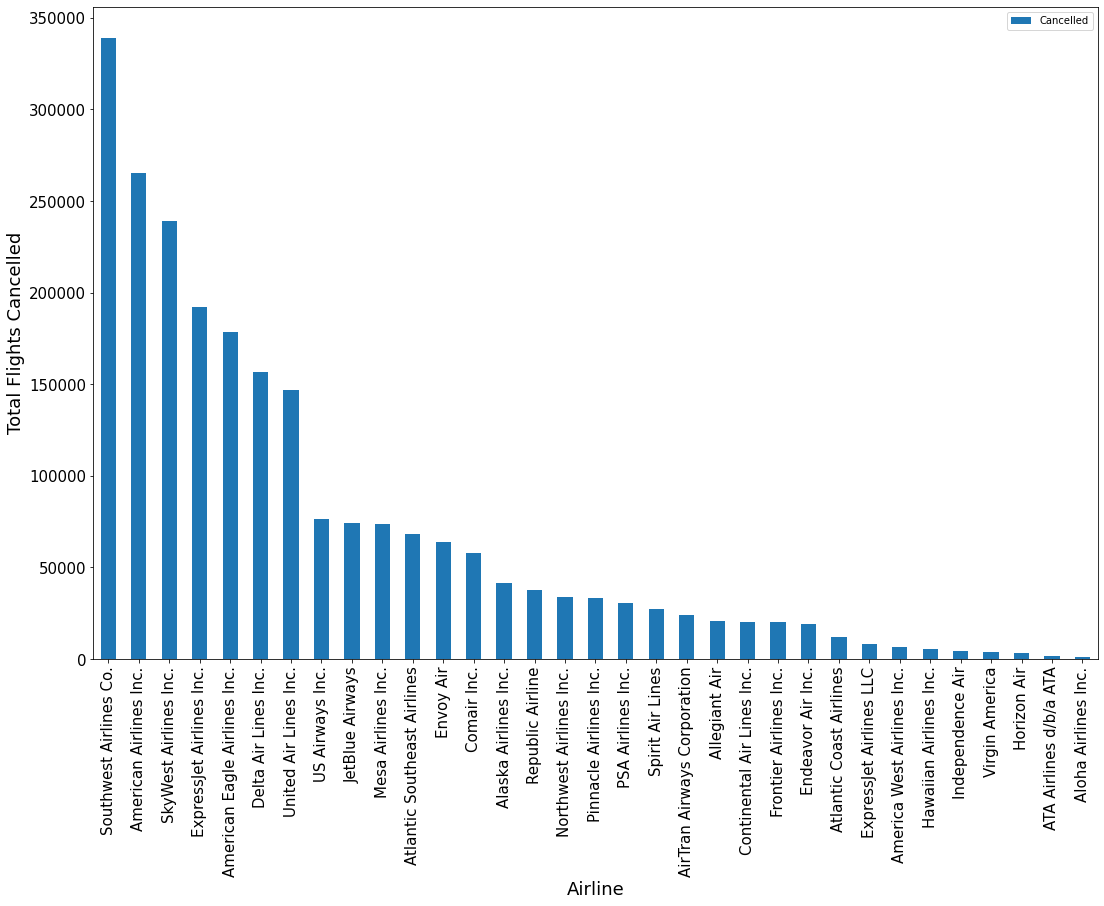

In [11]:
total_cancelled_bar = total_cancelled_df.plot(kind="bar", figsize=(18,12),
                                linewidth=10)

plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
total_cancelled_bar.set_xlabel('Airline', fontsize=18)
total_cancelled_bar.set_ylabel('Total Flights Cancelled', fontsize=18)

# Save the figure
plt.savefig("Output Images/Total Cancellations.png")

# Show plot
plt.show()

In [12]:
percent_cancelled = airline_clean_df2.groupby(["Airline"]).sum()["Cancelled"] / airline_clean_df2.groupby(["Airline"]).sum()["Total Flights"] * 100
percent_cancelled_df = pd.DataFrame(percent_cancelled)
percent_cancelled_df = percent_cancelled_df.rename(columns={0:"Percent Cancelled"})
percent_cancelled_df.sort_values(by=['Percent Cancelled'], inplace=True, ascending=False)
percent_cancelled_df

,Percent Cancelled
Airline,
ExpressJet Airlines LLC,5.477552
Allegiant Air,4.491549
Envoy Air,3.936058
American Eagle Airlines Inc.,3.438330
PSA Airlines Inc.,3.348490
Comair Inc.,3.286564
Atlantic Coast Airlines,3.195750
Republic Airline,3.052419
Mesa Airlines Inc.,3.022531


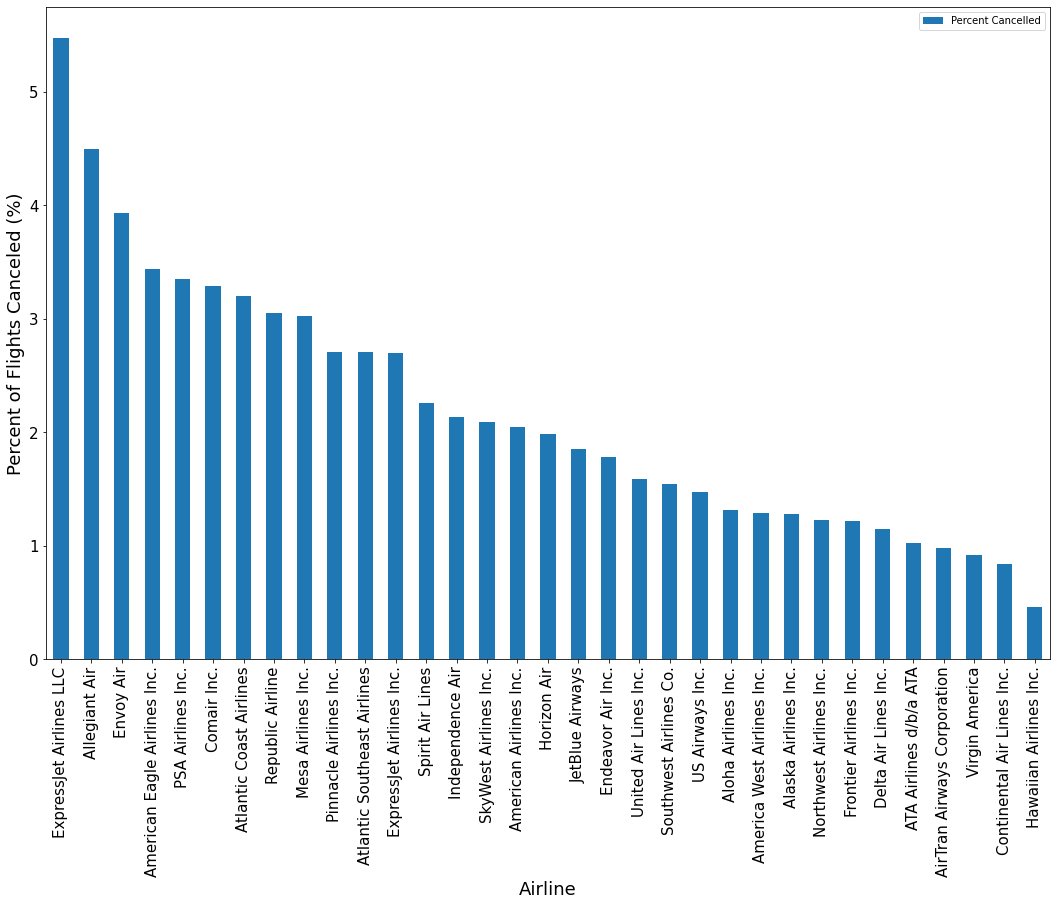

In [13]:
percent_cancelled_bar = percent_cancelled_df.plot(kind="bar", figsize=(18,12),
                                linewidth=10)

plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
percent_cancelled_bar.set_xlabel('Airline', fontsize=18)
percent_cancelled_bar.set_ylabel("Percent of Flights Canceled (%)", fontsize=18)



# Save the figure
plt.savefig("Output Images/Percent Cancelled.png")

# Show plot
plt.show()

In [14]:
total_delayed = airline_clean_df2.groupby(["Airline"]).sum()["Delays"]
total_delayed_df = pd.DataFrame(total_delayed)
total_delayed_df.sort_values(by=['Delays'], inplace=True, ascending=False)
total_delayed_df

,Delays
Airline,
Southwest Airlines Co.,4053401.0
American Airlines Inc.,2609248.0
Delta Air Lines Inc.,2179117.0
SkyWest Airlines Inc.,1984694.0
United Air Lines Inc.,1814691.0
ExpressJet Airlines Inc.,1529090.0
American Eagle Airlines Inc.,1129165.0
US Airways Inc.,997160.0
JetBlue Airways,953638.0


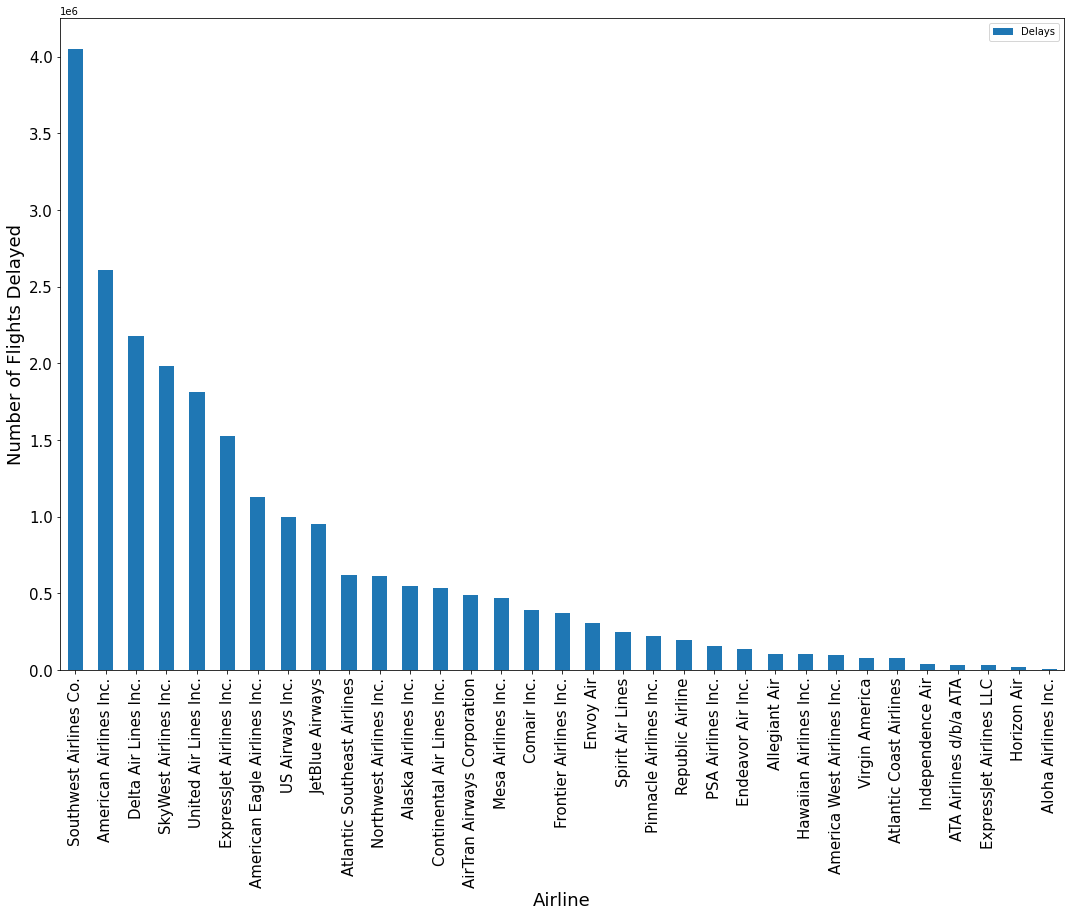

In [15]:
total_delayed_bar = total_delayed_df.plot(kind="bar", figsize=(18,12),
                                linewidth=10)

plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
total_delayed_bar.set_xlabel('Airline', fontsize=18)
total_delayed_bar.set_ylabel('Number of Flights Delayed', fontsize=18)


# Save the figure
plt.savefig("Output Images/Total Delayed.png")

# Show plot
plt.show()

In [16]:
percent_delayed = airline_clean_df2.groupby(["Airline"]).sum()["Delays"] / airline_clean_df2.groupby(["Airline"]).sum()["Total Flights"] * 100
percent_delayed_df = pd.DataFrame(percent_delayed)
percent_delayed_df = percent_delayed_df.rename(columns={0:"Percent Delayed"})
percent_delayed_df.sort_values(by=['Percent Delayed'], inplace=True, ascending=False)
percent_delayed_df

,Percent Delayed
Airline,
Atlantic Southeast Airlines,24.466145
JetBlue Airways,23.679903
Allegiant Air,22.649370
Comair Inc.,22.320772
Frontier Airlines Inc.,22.195211
Northwest Airlines Inc.,22.042219
Continental Air Lines Inc.,21.954075
American Eagle Airlines Inc.,21.779779
ExpressJet Airlines Inc.,21.495126


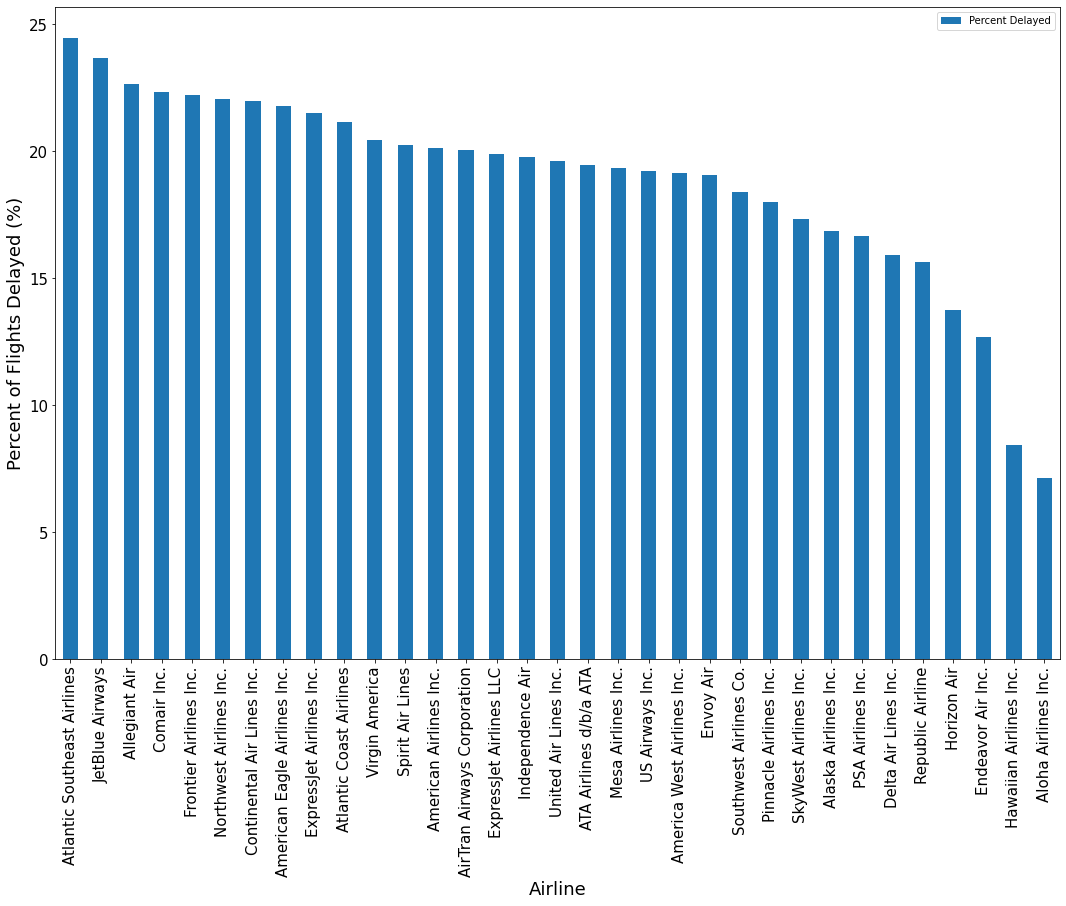

In [17]:
percent_delayed_bar = percent_delayed_df.plot(kind="bar", figsize=(18,12),
                                linewidth=10)

plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
percent_delayed_bar.set_xlabel('Airline', fontsize=18)
percent_delayed_bar.set_ylabel("Percent of Flights Delayed (%)", fontsize=18)

# Save the figure
plt.savefig("Output Images/Percent Delayed.png")

# Show plot
plt.show()

# Brinda Contribution

In [18]:
df1 = airline_clean_df[['year', 'month', 'arr_cancelled']].dropna()
df1=df1.groupby(['year', 'month']).sum()
df1.reset_index(inplace=True)

In [19]:
df1.head()

,year,month,arr_cancelled
0,2003,6,4161.0
1,2003,7,7835.0
2,2003,8,9109.0
3,2003,9,7691.0
4,2003,10,5091.0


Text(0, 0.5, 'Number of cancelled arrivals')

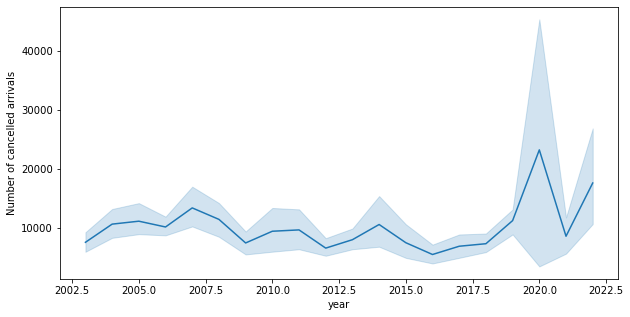

In [20]:
plt.figure(figsize=(10,5))

sns.lineplot(data=df1, x="year", y="arr_cancelled")
plt.ylabel('Number of cancelled arrivals')

In [21]:
df_cancel = airline_clean_df[['carrier_name', 'arr_cancelled']].dropna()
df_carrier = df_cancel.groupby('carrier_name').mean()
df_cancel = df_carrier.sort_values(by=['arr_cancelled'], ascending=False)
df_cancel.head()

,arr_cancelled
carrier_name,
Southwest Airlines Co.,19.298589
American Airlines Inc.,13.406070
American Eagle Airlines Inc.,11.572254
Atlantic Coast Airlines,9.545092
Republic Airline,8.472542


Text(0, 0.5, 'Number of delayed flights')

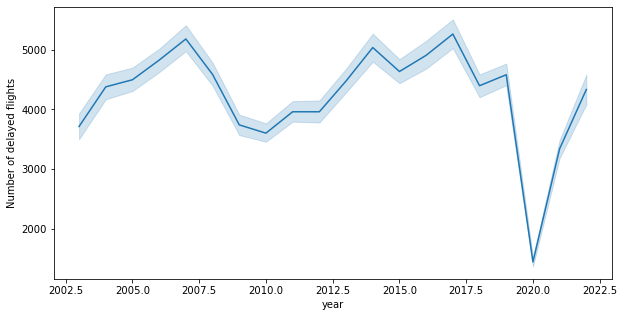

In [22]:
plt.figure(figsize=(10,5))

sns.lineplot(data=airline_clean_df, x="year", y="arr_delay")
plt.ylabel('Number of delayed flights')

In [23]:
df_delay = airline_clean_df[['carrier_name', 'arr_delay']].dropna()
df_carrier_delay = df_delay.groupby('carrier_name').mean()
df_delay = df_carrier_delay.sort_values(by=['arr_delay'], ascending=False)
df_delay.head()

,arr_delay
carrier_name,
Southwest Airlines Co.,11242.021393
American Airlines Inc.,8029.828781
United Air Lines Inc.,5979.190406
JetBlue Airways,5429.910599
Delta Air Lines Inc.,4575.015808


In [24]:
df_delay_airport = airline_clean_df[['airport_name', 'arr_delay']].dropna()
df_airport_delay = df_delay_airport.groupby('airport_name').mean()
df_delay_airport = df_airport_delay.sort_values(by=['arr_delay'], ascending=False)
df_delay_airport.head()

,arr_delay
airport_name,
"Chicago, IL: Chicago O'Hare International",31867.799072
"Atlanta, GA: Hartsfield-Jackson Atlanta International",27830.672920
"Dallas/Fort Worth, TX: Dallas/Fort Worth International",20571.237799
"Newark, NJ: Newark Liberty International",17511.091818
"San Francisco, CA: San Francisco International",16140.159024


# Christian Contribution

In [27]:
import pandas as pd
from datetime import date
import numpy as np
import matplotlib.pyplot as plt

airline_delay_df = pd.read_csv("Resources/Airline_Delay_cause.csv")
airline_delay_df.info()
airline_delay_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318017 entries, 0 to 318016
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 318017 non-null  int64  
 1   month                318017 non-null  int64  
 2   carrier              318017 non-null  object 
 3   carrier_name         318017 non-null  object 
 4   airport              318017 non-null  object 
 5   airport_name         318017 non-null  object 
 6   arr_flights          317529 non-null  float64
 7   arr_del15            317289 non-null  float64
 8   carrier_ct           317529 non-null  float64
 9   weather_ct           317529 non-null  float64
 10  nas_ct               317529 non-null  float64
 11  security_ct          317529 non-null  float64
 12  late_aircraft_ct     317529 non-null  float64
 13  arr_cancelled        317529 non-null  float64
 14  arr_diverted         317529 non-null  float64
 15  arr_delay        

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",136.0,7.0,5.95,0.00,...,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",91.0,16.0,7.38,0.00,...,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",19.0,2.0,0.13,0.00,...,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,14.0,7.26,0.76,...,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",181.0,19.0,13.84,0.00,...,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0


In [28]:
airline_delays_df = airline_delay_df.dropna()
airline_delays_df.info()

#check for duplicate rows based on identifying columns, not just 
duplicate = airline_delays_df[airline_delays_df.duplicated(['year', 'month', 'carrier', 'airport'])]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317289 entries, 0 to 318016
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 317289 non-null  int64  
 1   month                317289 non-null  int64  
 2   carrier              317289 non-null  object 
 3   carrier_name         317289 non-null  object 
 4   airport              317289 non-null  object 
 5   airport_name         317289 non-null  object 
 6   arr_flights          317289 non-null  float64
 7   arr_del15            317289 non-null  float64
 8   carrier_ct           317289 non-null  float64
 9   weather_ct           317289 non-null  float64
 10  nas_ct               317289 non-null  float64
 11  security_ct          317289 non-null  float64
 12  late_aircraft_ct     317289 non-null  float64
 13  arr_cancelled        317289 non-null  float64
 14  arr_diverted         317289 non-null  float64
 15  arr_delay        

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay


In [30]:
df = pd.read_csv("Resources/Airline_Delay_cause.csv",
                 parse_dates= {"date" : ["year","month"]},
                keep_date_col=True).dropna()
df.info()

#DATE = []
#for y, m in zip(airline_delays_df.year, airline_delays_df.month):
#    DATE.append(date(y, m, 1))

#airline_delays_df['DATE'] = DATE

#x_axis = airline_delays_df[""]
#y_axis
#airline_delays_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317289 entries, 0 to 318016
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   date                 317289 non-null  datetime64[ns]
 1   year                 317289 non-null  object        
 2   month                317289 non-null  object        
 3   carrier              317289 non-null  object        
 4   carrier_name         317289 non-null  object        
 5   airport              317289 non-null  object        
 6   airport_name         317289 non-null  object        
 7   arr_flights          317289 non-null  float64       
 8   arr_del15            317289 non-null  float64       
 9   carrier_ct           317289 non-null  float64       
 10  weather_ct           317289 non-null  float64       
 11  nas_ct               317289 non-null  float64       
 12  security_ct          317289 non-null  float64       
 13  late_aircraft_

In [31]:
df_group = df.groupby(["airport_name"]).sum()
df_group['arr_flights'].sort_values(ascending=False)

airport_name
Atlanta, GA: Hartsfield-Jackson Atlanta International     7259395.0
Chicago, IL: Chicago O'Hare International                 5852102.0
Dallas/Fort Worth, TX: Dallas/Fort Worth International    5138128.0
Denver, CO: Denver International                          4258252.0
Los Angeles, CA: Los Angeles International                4008346.0
                                                            ...    
Spokane, WA: Fairchild AFB                                      1.0
Fort Collins/Loveland, CO: Northern Colorado Regional           1.0
Columbus, MS: Columbus AFB                                      1.0
Rapid City, SD: Ellsworth AFB                                   1.0
Kansas City, MO: Charles B. Wheeler Downtown                    1.0
Name: arr_flights, Length: 418, dtype: float64

In [32]:
df2019_2022 = df.loc[df['year'].astype(int) > 2018]
df2019_2022.head()

df2020 = df.loc[df['year'].astype(int) == 2020]

#df2020.pivot(index='month', columns = 'carrier_name', values='arr_cancelled')
#df2020_1 = df2020[['date', 'year', 'month', 'arr_cancelled']]
#df2020_1['Percent Cancelled'] = len(df2020_1.loc[df2020_1['arr_cancelled'].astype(int) > 0])/len(df2020_1)
#df2020.groupby()
#airline_delayed_df = airline_delays_df.groupby("month").sum().sort_values("delays", ascending=False)

#airline_delayed_df["Delay Pct"] = airline_delayed_df["Delays"] / airline_delayed_df["Flights"] * 100

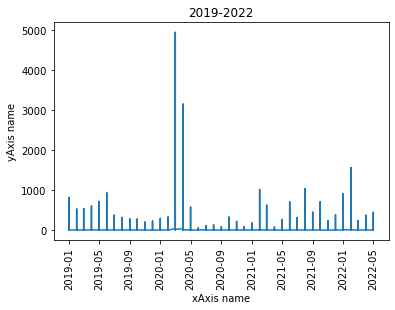

Text(0, 0.5, 'cancellations')

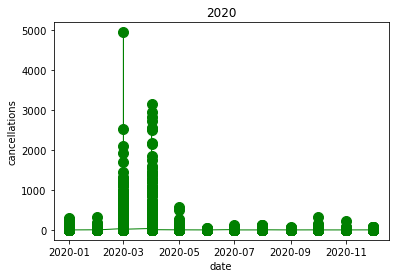

In [33]:
xAxis = df2019_2022['date']
yAxis = df2019_2022['arr_cancelled']
plt.plot(xAxis,yAxis)
plt.title('2019-2022')
plt.xlabel('xAxis name')
plt.ylabel('yAxis name')
plt.xticks(rotation="vertical")
plt.show()

#xAxis = df2020['date']
#yAxis = df2020['arr_cancelled']
#plt.plot(xAxis,yAxis)
#plt.title('2020')
#plt.xlabel('xAxis name')
#plt.ylabel('yAxis name')
#plt.xticks(rotation="vertical")
#plt.show()
x_axis = df2020['date']
y_axis = df2020['arr_cancelled']
ax1 = plt.subplots()
plt.title('2020')
plt.plot(x_axis, y_axis, linewidth=1, markersize=10, marker="o", color="green", label="Fahreneit")
plt.xlabel("date")
plt.ylabel("cancellations")

# Charlie Freeman Code

In [34]:
# Checking for duplicated values
airline_dupes = airline_df[airline_df[["year","month","carrier","airport"]].duplicated()]
airline_dupes.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay


In [35]:
# Delete/Rename Columns
airline_final_df = airline_clean_df.drop(["carrier", "airport"], axis=1)
airline_final_df.rename(columns = {
    "year": "Year",
    "month": "Month",
    "carrier_name": "Carrier",
    "airport_name": "Airport",
    "arr_flights": "Flights",
    "arr_del15": "Delays",
    "carrier_ct": "Carrier Ct",
    "weather_ct": "Weather Ct",
    "nas_ct": "Nas Ct",
    "security_ct": "Security Ct",
    "late_aircraft_ct": "Late Aircraft Ct",
    "arr_cancelled": "Arrival Cancelled",
    "arr_diverted": "Arrival Diverted",
    "arr_delay": "Arrival Delay",
    "carrier_delay": "Carrier Delay",
    "weather_delay": "Weather Delay",
    "nas_delay": "Nas Delay",
    "security_delay": "Security Delay",
    "late_aircraft_delay": "Late Aircraft Delay"    
}, inplace=True)

airline_final_df.columns

Index(['Year', 'Month', 'Carrier', 'Airport', 'Flights', 'Delays',
       'Carrier Ct', 'Weather Ct', 'Nas Ct', 'Security Ct', 'Late Aircraft Ct',
       'Arrival Cancelled', 'Arrival Diverted', 'Arrival Delay',
       'Carrier Delay', 'Weather Delay', 'Nas Delay', 'Security Delay',
       'Late Aircraft Delay'],
      dtype='object')

In [36]:
# Find Carrier with most cancellations within a given month
max_cancellations = airline_final_df[["Arrival Cancelled"]].max()
airline_final_df[airline_final_df["Arrival Cancelled"].isin(max_cancellations)]

,Year,Month,Carrier,Airport,Flights,Delays,Carrier Ct,Weather Ct,Nas Ct,Security Ct,Late Aircraft Ct,Arrival Cancelled,Arrival Diverted,Arrival Delay,Carrier Delay,Weather Delay,Nas Delay,Security Delay,Late Aircraft Delay
42296,2020,3,Delta Air Lines Inc.,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",20669.0,1139.0,421.41,15.75,399.57,0.0,302.27,4951.0,8.0,81479.0,49330.0,2127.0,13887.0,0.0,16135.0


In [37]:
airline_cancelled_df = airline_final_df.groupby(["Year", "Carrier"]).max()[["Arrival Cancelled","Arrival Delay"]]
airline_cancelled_df.head(10)

Arrival Cancelled  Arrival Delay
Year Carrier                                                       
2003 ATA Airlines d/b/a ATA                     46.0        39486.0
     AirTran Airways Corporation                81.0        82204.0
     Alaska Airlines Inc.                       90.0        41462.0
     America West Airlines Inc.                 70.0        38355.0
     American Airlines Inc.                    321.0       189546.0
     American Eagle Airlines Inc.              511.0       143476.0
     Atlantic Coast Airlines                   293.0       123729.0
     Atlantic Southeast Airlines               250.0       126716.0
     Continental Air Lines Inc.                159.0       119787.0
     Delta Air Lines Inc.                      296.0       218313.0

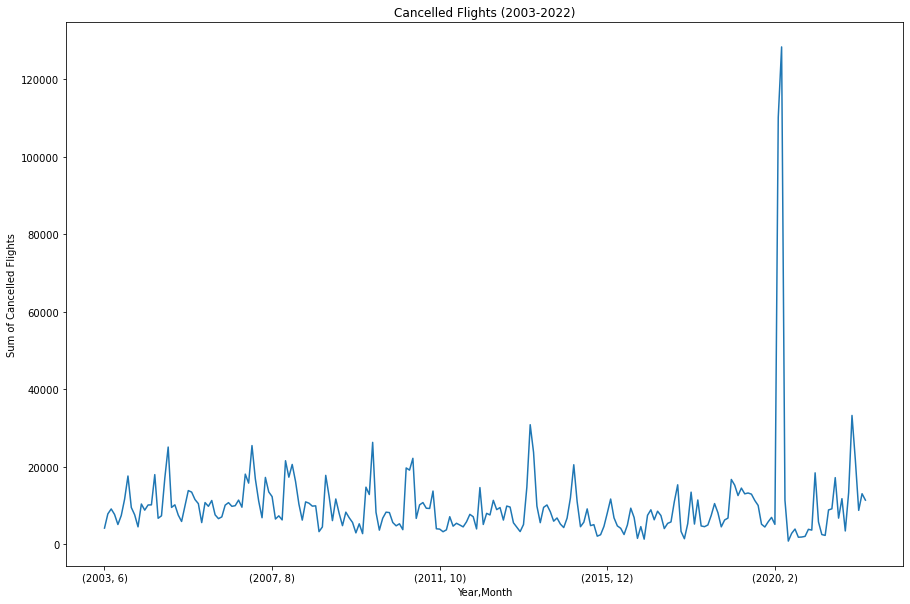

In [38]:
airline_cancels_df = airline_final_df.groupby(["Year", "Month"]).sum()["Arrival Cancelled"].plot(
    kind="line", title="Cancelled Flights (2003-2022)", ylabel="Sum of Cancelled Flights", figsize=(15,10))

In [39]:
# Calculate the most delays within a given month
max_delays = airline_final_df[["Delays"]].max()
airline_final_df[airline_final_df["Delays"].isin(max_delays)]

,Year,Month,Carrier,Airport,Flights,Delays,Carrier Ct,Weather Ct,Nas Ct,Security Ct,Late Aircraft Ct,Arrival Cancelled,Arrival Diverted,Arrival Delay,Carrier Delay,Weather Delay,Nas Delay,Security Delay,Late Aircraft Delay
282932,2005,7,Delta Air Lines Inc.,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",19043.0,6377.0,997.0,81.68,3962.83,5.52,1329.97,882.0,187.0,433687.0,83649.0,6867.0,238440.0,417.0,104314.0


In [40]:
airline_delayed_df = airline_final_df.groupby("Airport").sum().sort_values("Delays", ascending=False)

airline_delayed_df["Delay Pct"] = airline_delayed_df["Delays"] / airline_delayed_df["Flights"] * 100

airline_most_delayed_df = airline_delayed_df[(airline_delayed_df["Flights"] > 1000000)].sort_values(by="Delay Pct", ascending=False). \
    drop(["Year","Month","Carrier Ct","Weather Ct","Nas Ct","Late Aircraft Ct","Security Ct","Arrival Cancelled","Arrival Diverted"], axis=1)
airline_most_delayed_df.head()#[["Flights","Delays","Delay Pct","Arr Delay","Carrier Delay","Weather Delay","Nas Delay","Security Delay","Late Aircraf

,Flights,Delays,Arrival Delay,Carrier Delay,Weather Delay,Nas Delay,Security Delay,Late Aircraft Delay,Delay Pct
Airport,,,,,,,,,
"Newark, NJ: Newark Liberty International",2385120.0,670034.0,47297459.0,7153209.0,1663790.0,26802372.0,42649.0,11635439.0,28.092255
"New York, NY: LaGuardia",2120184.0,526977.0,33661573.0,6841139.0,1793434.0,16633156.0,26399.0,8367445.0,24.855248
"San Francisco, CA: San Francisco International",2766227.0,677788.0,43642990.0,9164339.0,1380983.0,19596147.0,51475.0,13450046.0,24.502255
"New York, NY: John F. Kennedy International",1955788.0,449914.0,29812161.0,7430162.0,1218921.0,11742767.0,58261.0,9362050.0,23.004232
"Chicago, IL: Chicago O'Hare International",5852102.0,1276665.0,89293573.0,19020089.0,3485381.0,36755442.0,69710.0,29962951.0,21.815495


In [41]:
airline_least_delayed_df = airline_most_delayed_df.sort_values(by="Delay Pct")
airline_least_delayed_df.head()

,Flights,Delays,Arrival Delay,Carrier Delay,Weather Delay,Nas Delay,Security Delay,Late Aircraft Delay,Delay Pct
Airport,,,,,,,,,
"Salt Lake City, UT: Salt Lake City International",2303511.0,325930.0,17522888.0,6615630.0,1144225.0,2933342.0,45861.0,6783830.0,14.149270
"Charlotte, NC: Charlotte Douglas International",2608671.0,423743.0,23459012.0,7569369.0,1105382.0,5684526.0,41787.0,9057948.0,16.243635
"Phoenix, AZ: Phoenix Sky Harbor International",3298414.0,536104.0,27523653.0,9630752.0,989129.0,5273259.0,85611.0,11544902.0,16.253387
"Minneapolis, MN: Minneapolis-St Paul International",2441487.0,402830.0,24361636.0,9060003.0,1757164.0,5505195.0,43584.0,7995690.0,16.499371
"Detroit, MI: Detroit Metro Wayne County",2542507.0,420022.0,25821105.0,9286751.0,1704668.0,5357846.0,41798.0,9430042.0,16.519994


<AxesSubplot:title={'center':'Delayed Flights (2003-2022)'}, xlabel='Year,Month', ylabel='Sum of Delayed Flights'>

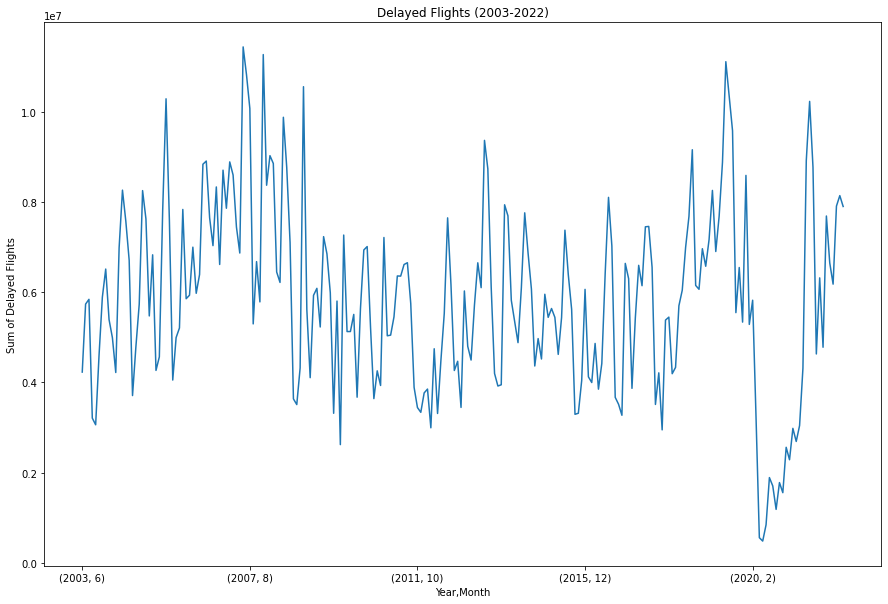

In [42]:
airline_final_df.groupby(["Year", "Month"]).sum()["Arrival Delay"].plot(
    kind="line", title="Delayed Flights (2003-2022)", ylabel="Sum of Delayed Flights", figsize=(15,10))